<a href="https://colab.research.google.com/github/JDChiaki/ICT358_Final_Project/blob/main/datascience_pytorch_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Importing PyTorch and Setting device-agnostic code

In [1]:
import torch
from torch import nn

torch.__version__

'2.1.0+cu121'

In [2]:
# Setup device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 1. Getting data

Our dataset is a subset of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing).

Why do this?

When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.

The whole point is to speed up how fast you can experiment.

In [4]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path('data/')
pzs = 'pizza_steak_sushi'
pzs_zip = pzs + '.zip'
img_path = data_path / pzs
zip_path = data_path / pzs_zip


#  If the image folder doesn't exit, download it and prepare it...
if img_path.is_dir():
  print(f'{img_path} directory already exists... skipping download')
else:
  print(f'{img_path} doesn\'t exist, creating one...')
  img_path.mkdir(parents=True, exist_ok=True)
  print(f'{img_path} is successfully created!')

  # Download
  with open(zip_path, 'wb') as f:
    request = requests.get('https://github.com/JDChiaki/ICT358_Final_Project/raw/main/pizza_steak_sushi.zip')
    print('Downloading pizza, steak, sushi data...')
    f.write(request.content)
    print('Success!')

  # Unzipping
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print(f'Unizipping {str(zip_path)}...')
    zip_ref.extractall(img_path)
    print('Success!')

data/pizza_steak_sushi directory already exists... skipping download


In [5]:
# import shutil
# shutil.rmtree('data')

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     print(f'Unizipping {str(zip_path)}...')
#     zip_ref.extractall(img_path)
#     print('Success!')

## 2. Becoming one with the data (data preparation and data exploration)

In [6]:
import os
def walk_through_dir(dir_path):
  '''Walks through dir_path returning its contents.'''
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in \'{dirpath}\'.')

walk_through_dir(img_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi/train/sushi'.


In [7]:
# Setup training and testing paths
train_dir = img_path / 'train'
test_dir = img_path / 'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing an Image

Let's write some code to:
1. Get all of the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image and print metadata

Random image path: data/pizza_steak_sushi/train/pizza/1412034.jpg
Image class: pizza
Image height: 512
Image width: 512


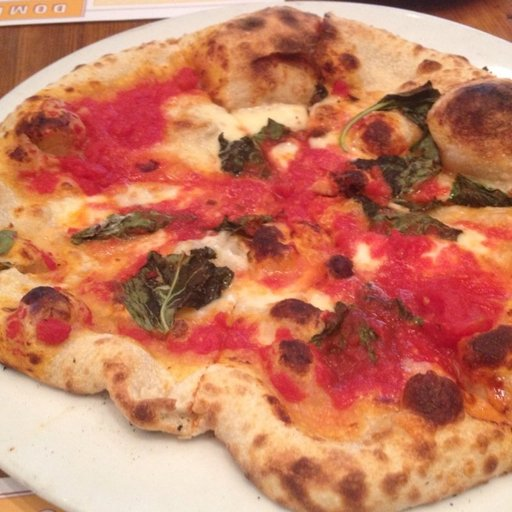

In [8]:
import random
from PIL import Image

## Set seed
# random.seed(42)

# 1. Get all of the image paths
img_path_list = list(img_path.glob('*/*/*.jpg'))

# 2. Pick a random image path
random_img_path = random.choice(img_path_list)

# 3. Get image class from the path name (the image class is the name of directory where the image is stored)
img_class = random_img_path.parent.stem

# 4. Open image
img = Image.open(random_img_path)

# 5. Print metadata
print(f'Random image path: {random_img_path}')
print(f'Image class: {img_class}')
print(f'Image height: {img.height}')
print(f'Image width: {img.width}')
img

(-0.5, 511.5, 511.5, -0.5)

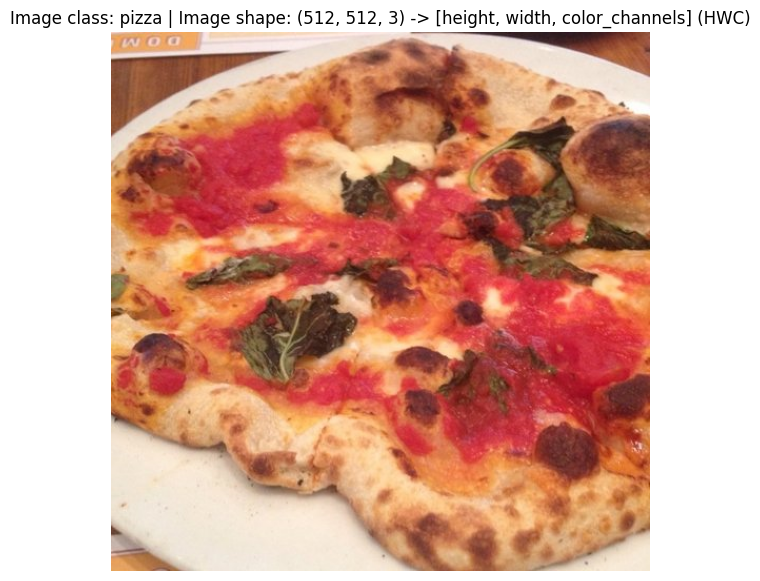

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f'Image class: {img_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)')
plt.axis(False)

array([[[251, 207, 194],
        [249, 207, 193],
        [246, 206, 196],
        ...,
        [152,  91,  70],
        [145,  87,  65],
        [140,  82,  60]],

       [[235, 188, 168],
        [232, 187, 166],
        [228, 185, 166],
        ...,
        [147,  86,  65],
        [147,  86,  65],
        [145,  87,  65]],

       [[227, 175, 138],
        [226, 174, 137],
        [222, 172, 135],
        ...,
        [145,  83,  60],
        [150,  88,  67],
        [154,  93,  72]],

       ...,

       [[230, 165,  99],
        [230, 165,  97],
        [229, 164,  98],
        ...,
        [243, 231, 209],
        [243, 231, 209],
        [243, 231, 209]],

       [[228, 163,  95],
        [229, 165,  94],
        [229, 164,  96],
        ...,
        [244, 232, 210],
        [243, 231, 209],
        [243, 231, 209]],

       [[227, 163,  92],
        [228, 164,  93],
        [229, 165,  94],
        ...,
        [244, 232, 210],
        [244, 232, 210],
        [244, 232, 210]]], dtype=uint8)
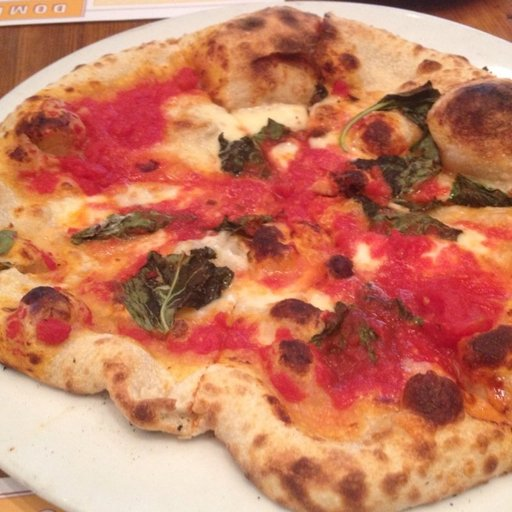

In [10]:
img_as_array

## 3. Transforming data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors (in our casae, numerical representation of our images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `Dataset` and `DataLoader`

In [11]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

In [12]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our image to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),  # probability 50%
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [13]:
data_transform(img)

tensor([[[0.5882, 0.5451, 0.5098,  ..., 0.8784, 0.8902, 0.9020],
         [0.5922, 0.6157, 0.6118,  ..., 0.8784, 0.8863, 0.9059],
         [0.6078, 0.6510, 0.6706,  ..., 0.8627, 0.8706, 0.8824],
         ...,
         [0.9608, 0.9569, 0.9373,  ..., 0.6431, 0.7020, 0.7608],
         [0.9608, 0.9647, 0.9686,  ..., 0.7412, 0.7922, 0.8392],
         [0.9608, 0.9647, 0.9647,  ..., 0.8314, 0.8902, 0.9020]],

        [[0.3255, 0.2784, 0.2392,  ..., 0.6588, 0.6549, 0.6706],
         [0.3255, 0.3294, 0.3176,  ..., 0.6824, 0.6667, 0.6549],
         [0.3451, 0.3569, 0.3765,  ..., 0.7059, 0.7059, 0.7020],
         ...,
         [0.9059, 0.8941, 0.8706,  ..., 0.5098, 0.5804, 0.6431],
         [0.9137, 0.9137, 0.9059,  ..., 0.5137, 0.5608, 0.6078],
         [0.9098, 0.9098, 0.9137,  ..., 0.5765, 0.6275, 0.6353]],

        [[0.2353, 0.1882, 0.1647,  ..., 0.4980, 0.4824, 0.4745],
         [0.2431, 0.2118, 0.1961,  ..., 0.5490, 0.5020, 0.4196],
         [0.2627, 0.2275, 0.2235,  ..., 0.5961, 0.5882, 0.

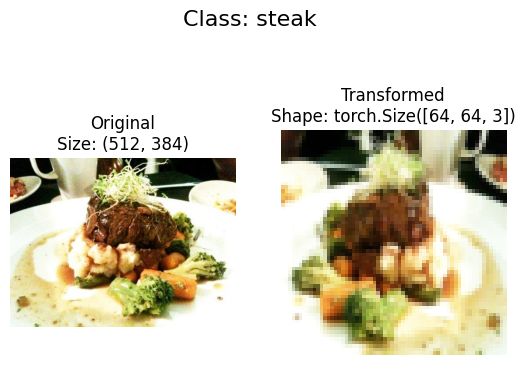

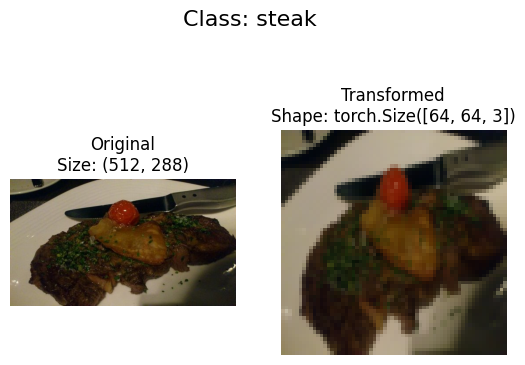

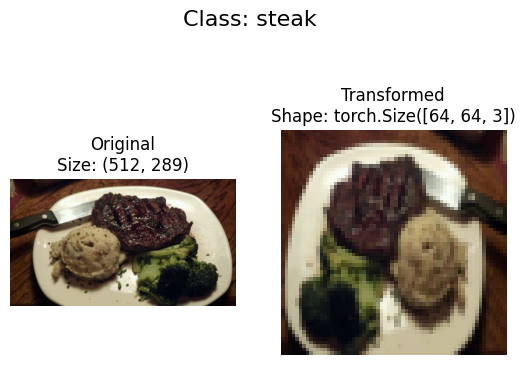

In [14]:
def plot_transformed_images(img_paths: list, transform: transforms.Compose, n: int=3, seed=42):
  '''Selects random images from a path of images and loads/transforms them then plots the original vs the transformed version.'''
  if seed:
    random.seed(seed)
  random_img_paths = random.sample(img_paths, k=n)
  for img_path in random_img_paths:
    with Image.open(img_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original\nSize: {f.size}')
      ax[0].axis(False)

      # Transform and plot target image
      transformed_img = transform(f).permute(1, 2, 0)  # (C, H, W) -> (H, W, C)
      ax[1].imshow(transformed_img)
      ax[1].set_title(f'Transformed\nShape: {transformed_img.shape}')
      ax[1].axis('off')

      fig.suptitle(f'Class: {img_path.parent.stem}', fontsize=16)

plot_transformed_images(img_paths=img_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)

## 4. Option 1: Loading image data using `ImageFolder`

We can load image classification data using `torchvision.datasets.ImageFolder` - https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html#imagefolder

In [15]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,  # a transform for the data
                                  target_transform=None)  # a transform for the label/target
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [16]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [17]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [18]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
# Check the lengths of our dataset
len(train_data), len(test_data)

(450, 150)

In [20]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [21]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f'Image tensor:\n {img}')
print(f'Image shape: {img.shape}')
print(f'Image datatype: {img.dtype}')
print(f'Image label: {label}')
print(f'Label datatype: {type(label)}')

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, weight]
Image permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

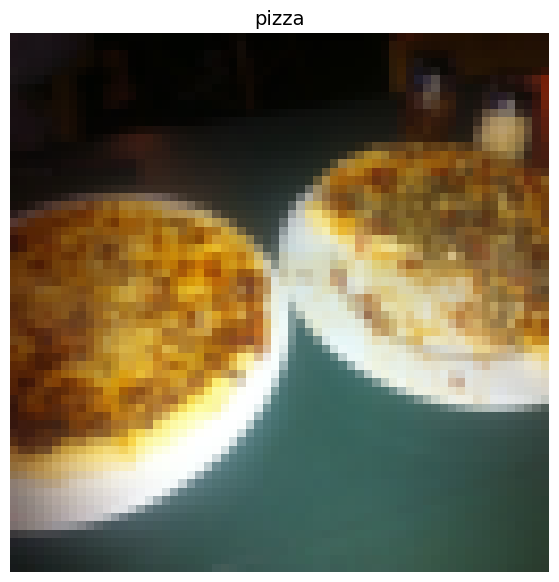

In [22]:
# Rearrange the order dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f'Original shape: {img.shape} -> [color_channels, height, weight]')
print(f'Image permute: {img_permute.shape} -> [height, width, color_channels]')

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label], fontsize=14)

### 4.1 Turn loaded images into `DataLoader`'s

A `DataLoader` is going to help us turn out `Dataset`'s into iterables and we can customise the `batch size` so our model can see `batch_size` images at a time.

In [23]:
from pickle import FALSE
# Turn train and test datasests into DataLoader's
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e511a507940>,
 <torch.utils.data.dataloader.DataLoader at 0x7e511a837eb0>)

In [24]:
len(train_dataloader), len(test_dataloader)

(450, 150)

In [25]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f'Image shape: {img.shape} -> [batch_size, color_channels, height, width]')
print(f'Label shape: {label.shape}')

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 5. Option 2: Loading Image Data with a Custom `Dataset`

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset

Pros:
* Can create a `Dataset` out of almost anything
* Not limited to PyTorch pre-built `Dataset` functions

Cons:
* Even though you could create `Dataset` out of almost anything, it doesn't mean it will work...
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or perfomance issues

All custom datasets in PyTorch, often subclass - https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset

In [26]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [27]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:
1. Get the class names using `os.scandir()` to traverse a terget directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure).
3. Turn the class names into a dict and a list and return them

In [28]:
# Setup path for target directory
target_directory = train_dir
print(f'Target dir: {target_directory}')

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [29]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  '''Finds the class folder names in a target directory.'''
  # 1. Det the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f'Couldn\'t find any classes in {directory}... please check file structure.')

  # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [30]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset, we want to:

1. Subclass `torch.utils.data.Dataset`
1. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
  * paths - paths of our images
  * transform - the transform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image
5. Overwirte the `__len__()` method to return the length of our dataset
6. Overwrite the `__getitem__()` method to return a given sample when passed an index

In [31]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    '''Opens an image via a path and returns it.'''
    img_path = self.paths[index]
    return Image.open(img_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    '''Returns the total number of samples.'''
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    '''Returns one sample of data, data and label(X, y).'''
    img = self.load_image(index)
    class_name = self.paths[index].parent.name  # expects path in format: data_folder/class_name/img.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx  # return data, label (X, y)
    return img, class_idx  # return untransformed image and label

In [32]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [33]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

In [34]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7e50ff1874c0>,
 <__main__.ImageFolderCustom at 0x7e50ff184550>)

In [35]:
len(train_data), len(train_data_custom)

(450, 450)

In [36]:
len(test_data), len(test_data_custom)

(150, 150)

In [37]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [38]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [39]:
# Check for equality between original ImageFolder Dataset and ImageFolderCustomDataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample indexes and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib (HWC)

In [40]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Adjust display if n is too high
  if n > 10:
    display_shape = False
    print(f'For display, purposes, n shouln\'t be larger than 10, setting to 10 and removing shape display.')

  # 3. Set the seed
  if seed:
    random.seed(seed)

  #4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setup plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_img, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_img_adjust = targ_img.permute(1, 2, 0)  # [color_channels, height, width] -> [height, width, color_channels]

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_img_adjust)
    plt.axis('off')
    if classes:
      title = f'Class: {classes[targ_label]}'
      if display_shape:
        title = title + f'\nShape: {targ_img_adjust.shape}'
    plt.title(title)

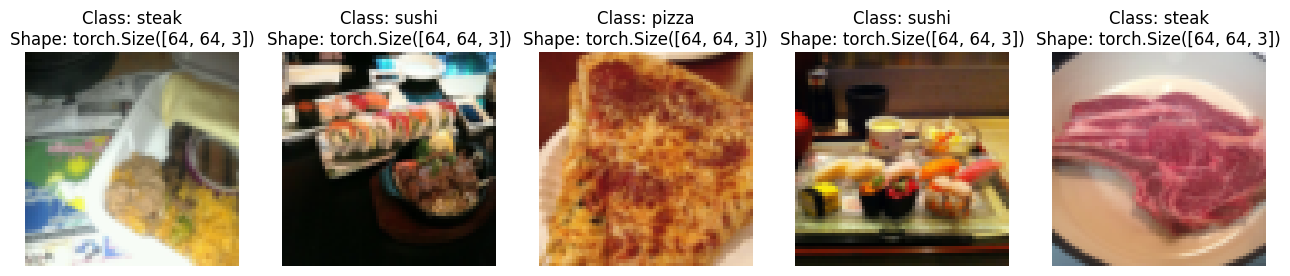

In [41]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

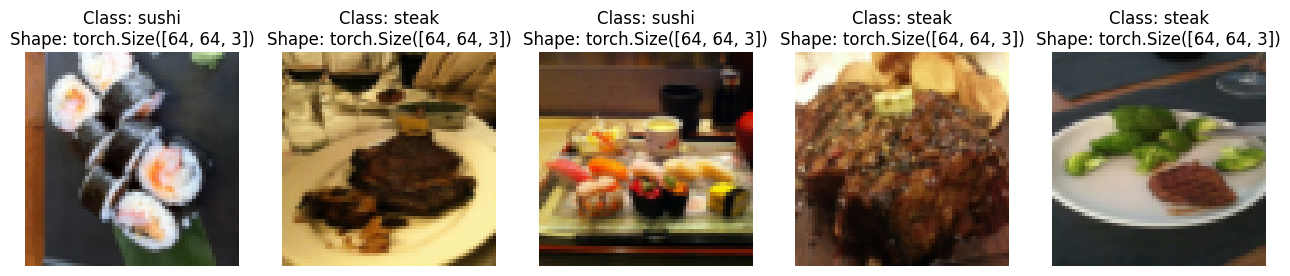

In [42]:
# Display random images from the ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

### 5.4 Turn custom loaded images into `DataLoader`'s

In [43]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7e50ff3f98d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e50ff3f8940>)

In [44]:
# Get image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shapes
img_custom.shape, label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## 6. Other forms of transforms (Data Augmentation)

Data augmentation is the process of artificially adding diversity to your training data.

In the case of image data, this may mean applying various image transformations to the training images.

This practice hopefully results in a model that's more generalizable to unseen data.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art levels...

In [45]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [46]:
img_path

PosixPath('data/pizza_steak_sushi')

In [47]:
# Get all image paths
img_path_list = list(img_path.glob('*/*/*.jpg'))
img_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/129666.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3770514.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3729167.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3497151.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3375083.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/930553.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/724290.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1067986.jpg')]

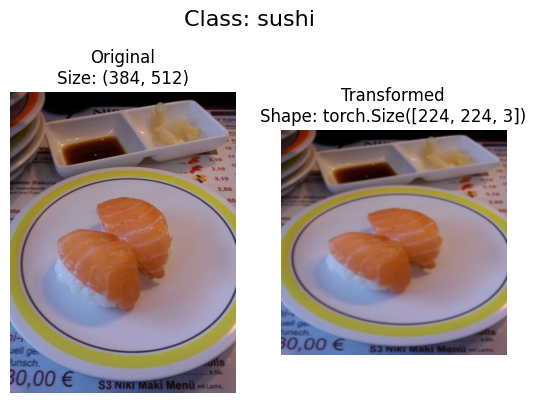

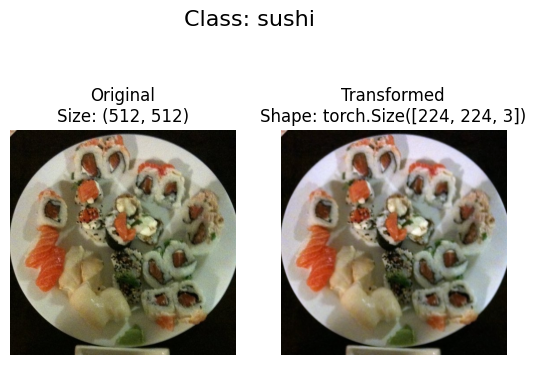

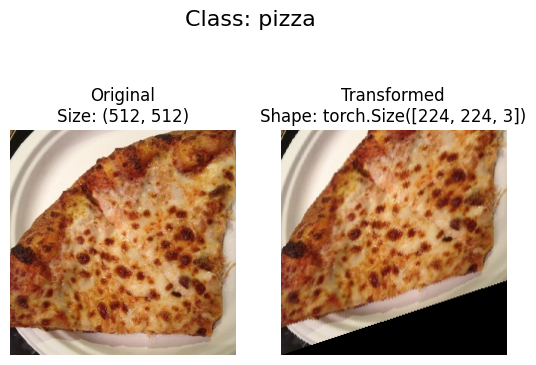

In [48]:
# Plot random tarnsformed images
plot_transformed_images(
    img_paths=img_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

## 7. Moddel 0: TinyVGG without data agumentation

Let's replicate TinyVGG architecture fro mthe CNN Explainer website: https://poloclub.github.io/cnn-explainer/

### 7.1 Creating transforms and loading data for Model 0

In [49]:
# Create simple transform

simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [50]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup bath size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### 7.2 Create TinyVGG model class

In [51]:
class TinyVGG(nn.Module):
  '''Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/'''
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)  # default stride value is same as kernel_size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)  # default stride value is same as kernel_size
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x)))  # benefits from operator fusion

In [52]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.4 Try a forward pass on a single imgae (to test the model)

In [53]:
# Get a single image batch
img_batch, label_batch = next(iter(train_dataloader_simple))
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [54]:
# Try a forward pass
model_0(img_batch.to(device))

tensor([[ 0.0212, -0.0040,  0.0116],
        [ 0.0190, -0.0012,  0.0085],
        [ 0.0224, -0.0014,  0.0080],
        [ 0.0206, -0.0046,  0.0091],
        [ 0.0220, -0.0016,  0.0100],
        [ 0.0195,  0.0004,  0.0091],
        [ 0.0230, -0.0043,  0.0122],
        [ 0.0182,  0.0006,  0.0116],
        [ 0.0200,  0.0003,  0.0093],
        [ 0.0200,  0.0005,  0.0105],
        [ 0.0212, -0.0030,  0.0087],
        [ 0.0205, -0.0024,  0.0106],
        [ 0.0206, -0.0038,  0.0112],
        [ 0.0191, -0.0022,  0.0070],
        [ 0.0214, -0.0030,  0.0086],
        [ 0.0169,  0.0044,  0.0053],
        [ 0.0243, -0.0032,  0.0113],
        [ 0.0220,  0.0004,  0.0114],
        [ 0.0183,  0.0006,  0.0094],
        [ 0.0203,  0.0026,  0.0086],
        [ 0.0207, -0.0012,  0.0097],
        [ 0.0208, -0.0029,  0.0089],
        [ 0.0198, -0.0023,  0.0090],
        [ 0.0203, -0.0028,  0.0091],
        [ 0.0191, -0.0002,  0.0105],
        [ 0.0210, -0.0054,  0.0107],
        [ 0.0207,  0.0014,  0.0075],
 

### 7.4 Use `torchinfo` to get an idea of the shapes going through our model

In [55]:
# Install torchinfo, import if it's available
try:
  import torchinfo
except ModuleNotFoundError:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### 7.5 Create train and test loops functions

* `train_step()` - takes in a model and dataloader and trains the model on the dataloader.
* `test_step()` - takes in a model and dataloader and evaluates the model on the dataloader.

In [56]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: str = device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)  # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item() / len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc

In [57]:
# Create test_step()
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: str = device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

### 7.6 Create a `train()` function to combine `train_step()` and `test_step()`

In [58]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloader + loss function
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device: str = device):
  # 2. Create empty results dictionary
  results = {'train_loss': [],
             'train_acc': [],
             'test_loss': [],
             'test_acc': []}
  # 3. Loop through training and tsting steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happenin'
    print(f'Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}')

    # 5. Update results dictionary
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

### 7.7 Train and evaulate model 0

In [59]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 30

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,  # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f'Total training time {end_time-start_time:.3f} seconds')

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1047 | Train acc: 0.3146 | Test loss: 1.0972 | Test acc: 0.2875
Epoch: 1 | Train loss: 1.0887 | Train acc: 0.4021 | Test loss: 1.0741 | Test acc: 0.4290
Epoch: 2 | Train loss: 1.0555 | Train acc: 0.4938 | Test loss: 1.0409 | Test acc: 0.4665
Epoch: 3 | Train loss: 0.9822 | Train acc: 0.5292 | Test loss: 0.9782 | Test acc: 0.5392
Epoch: 4 | Train loss: 0.9814 | Train acc: 0.4813 | Test loss: 0.9326 | Test acc: 0.5756
Epoch: 5 | Train loss: 0.8729 | Train acc: 0.6083 | Test loss: 0.9444 | Test acc: 0.5483
Epoch: 6 | Train loss: 0.9369 | Train acc: 0.6083 | Test loss: 0.9420 | Test acc: 0.5858
Epoch: 7 | Train loss: 0.8891 | Train acc: 0.5979 | Test loss: 0.9305 | Test acc: 0.5693
Epoch: 8 | Train loss: 0.8768 | Train acc: 0.5792 | Test loss: 0.9287 | Test acc: 0.5824
Epoch: 9 | Train loss: 0.8856 | Train acc: 0.6021 | Test loss: 0.9267 | Test acc: 0.5818
Epoch: 10 | Train loss: 0.8770 | Train acc: 0.6083 | Test loss: 0.9232 | Test acc: 0.5977
Epoch: 11 | Train lo

In [60]:
model_0_results

{'train_loss': [1.1046599706013998,
  1.0886549711227418,
  1.0555130004882813,
  0.9822142004966736,
  0.981415311495463,
  0.8728669643402099,
  0.936872144540151,
  0.889128037293752,
  0.8768059134483337,
  0.8856053829193116,
  0.8769918441772461,
  0.8332894285519917,
  0.8723428408304851,
  0.8412756800651551,
  0.8057313958803812,
  0.8439011057217916,
  0.8093032916386922,
  0.7547327434023221,
  0.7613930384318034,
  0.7498658219973247,
  0.8007184863090515,
  0.7929612517356872,
  0.7572859684626262,
  0.7139333645502727,
  0.6944649259249369,
  0.680279924472173,
  0.6131277193625768,
  0.6677856206893921,
  0.6058420141537985,
  0.6141475280125935],
 'train_acc': [0.3145833333333333,
  0.40208333333333335,
  0.49375,
  0.5291666666666667,
  0.48125,
  0.6083333333333333,
  0.6083333333333333,
  0.5979166666666667,
  0.5791666666666667,
  0.6020833333333333,
  0.6083333333333333,
  0.675,
  0.6145833333333334,
  0.5625,
  0.6166666666666667,
  0.6333333333333333,
  0.64375,

### 7.8 Plot the loss curves of Model 0

A **loss curve** is a way of tracking your model's progress over time.

In [61]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [62]:
def plot_loss_curves(results: Dict[str, List[float]]):
  '''Plots training curves of a results dictionary.'''
  # Get the loss values of the results dictionary (training and testing)
  loss = results['train_loss']
  test_loss = results['test_loss']

  # Get the accuracy values of the results dictionary (training and testing)
  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  # Figure out how many epochs there were
  epochs = range(len(results['train_loss']))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='train_loss')
  plt.plot(epochs, test_loss, label='test_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label='train_accuracy')
  plt.plot(epochs, test_accuracy, label='test_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

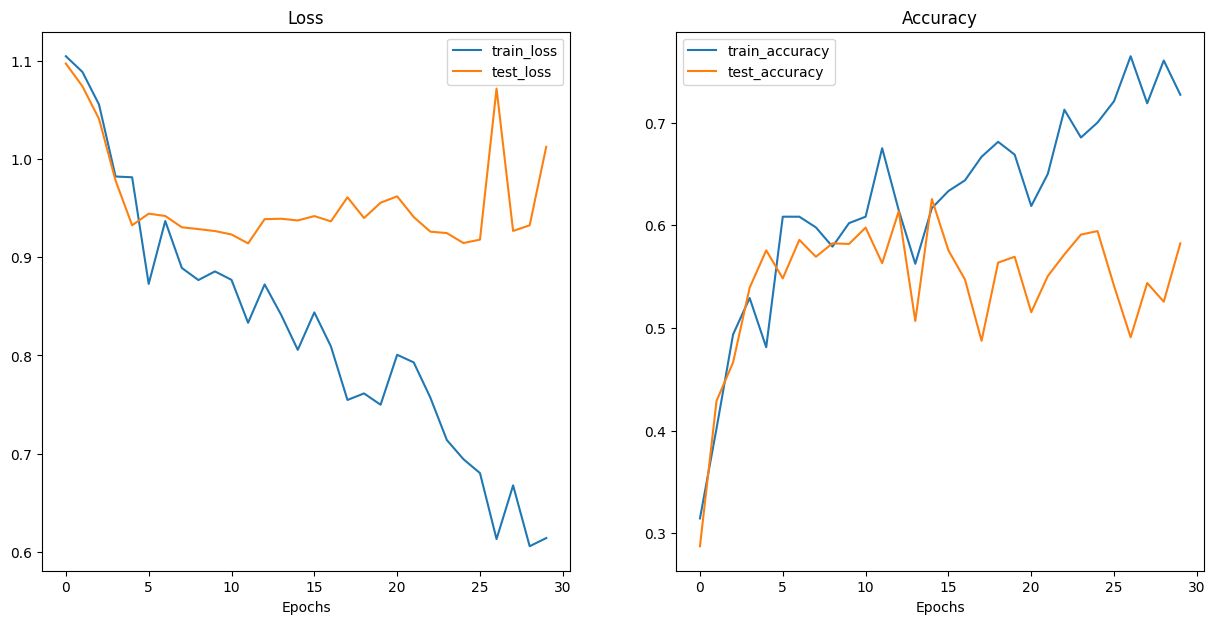

In [63]:
plot_loss_curves(model_0_results)

## 8. What should an ideal loss curve look like?

A loss curve is one of the most helpful ways to troubleshoot a model

## 9. Model 1: TinyVGG with Data Augmentation

Now let's try another modelling experiment this time using the same model as before with some data augmentation.

### 9.1 Create transform with augmentation

In [64]:
# Create training transform with TriviailAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

### 9.2 Create train and test `Dataset`'s and `DataLoader`'s with data augmentation

In [65]:
# Turn image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [66]:
# Turn our Datasets into DataLoaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

### 9.3 Construct and train model 1

This time we'll be using the same model architecture except this time we've augmented the training data

In [67]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Wonderful! Now we've a model and dataloaders, let's create a loss function and an optimizer and call upon our `train()` function to train and evaluate our model.

In [68]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 30

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

# End the timer and print out how long it took
end_time = timer()
print(f'Total training timer for model_1: {end_time-start_time:.3f} seconds')

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1024 | Train acc: 0.3083 | Test loss: 1.1021 | Test acc: 0.2875
Epoch: 1 | Train loss: 1.0973 | Train acc: 0.3771 | Test loss: 1.0865 | Test acc: 0.3812
Epoch: 2 | Train loss: 1.0836 | Train acc: 0.4125 | Test loss: 1.0586 | Test acc: 0.5449
Epoch: 3 | Train loss: 1.0264 | Train acc: 0.5021 | Test loss: 1.0019 | Test acc: 0.4688
Epoch: 4 | Train loss: 0.9982 | Train acc: 0.4917 | Test loss: 0.9862 | Test acc: 0.4455
Epoch: 5 | Train loss: 1.0364 | Train acc: 0.4667 | Test loss: 0.9632 | Test acc: 0.5307
Epoch: 6 | Train loss: 0.9977 | Train acc: 0.4917 | Test loss: 0.9451 | Test acc: 0.5534
Epoch: 7 | Train loss: 0.9817 | Train acc: 0.5458 | Test loss: 0.9556 | Test acc: 0.5608
Epoch: 8 | Train loss: 0.9757 | Train acc: 0.4958 | Test loss: 0.9512 | Test acc: 0.5330
Epoch: 9 | Train loss: 0.9772 | Train acc: 0.5229 | Test loss: 0.9362 | Test acc: 0.4994
Epoch: 10 | Train loss: 0.9986 | Train acc: 0.4500 | Test loss: 0.9340 | Test acc: 0.5909
Epoch: 11 | Train lo

### 9.4 Plot the loss curves of model 1

A loss curve helps you evaluate your models performance overtime.

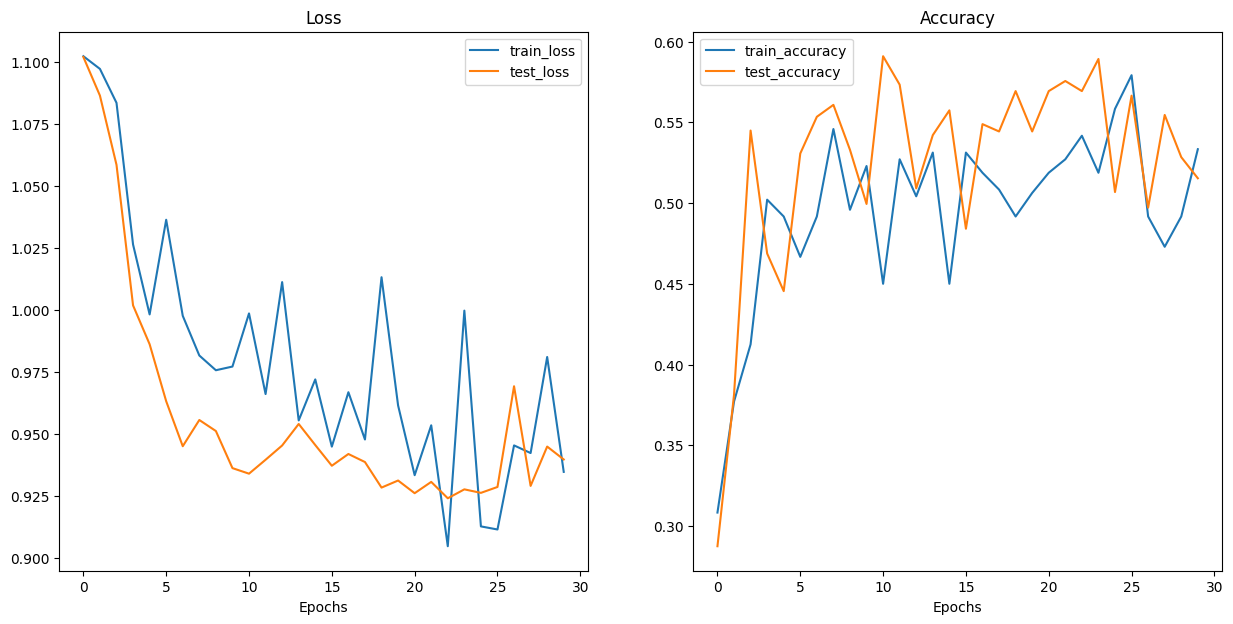

In [69]:
plot_loss_curves(model_1_results)

## 10. Compare the model results

After evaluating our modelling experiments on their own, it's important to compare them to each other.

There's a few different ways to do this:
1. Hard coding (what we're doing)
2. PyTorch + Tensorboard - https://pytorch.org/docs/stable/tensorboard.html
3. Weights & Biases - https://wandb.ai/site/experiment-tracking
3. MLFlow - https://mlflow.org/

In [70]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0     1.104660   0.314583   1.097169  0.287500
1     1.088655   0.402083   1.074057  0.428977
2     1.055513   0.493750   1.040900  0.466477
3     0.982214   0.529167   0.978176  0.539205
4     0.981415   0.481250   0.932555  0.575568
5     0.872867   0.608333   0.944377  0.548295
6     0.936872   0.608333   0.942028  0.585795
7     0.889128   0.597917   0.930536  0.569318
8     0.876806   0.579167   0.928691  0.582386
9     0.885605   0.602083   0.926697  0.581818
10    0.876992   0.608333   0.923203  0.597727
11    0.833289   0.675000   0.914098  0.563068
12    0.872343   0.614583   0.938811  0.613636
13    0.841276   0.562500   0.939218  0.506818
14    0.805731   0.616667   0.937469  0.625568
15    0.843901   0.633333   0.941933  0.575568
16    0.809303   0.643750   0.936534  0.547159
17    0.754733   0.666667   0.961047  0.487500
18    0.761393   0.681250   0.939930  0.563636
19    0.749866   0.668750   0.955547  0.569318
20    0.800718   0.618750   0.962013  0.515341
21    0.792961   0.650000   0.940984  0.550568
22    0.757286   0.712500   0.926111  0.571591
23    0.713933   0.685417   0.924608  0.590909
24    0.694465   0.700000   0.914508  0.594318
25    0.680280   0.720833   0.917944  0.540909
26    0.613128   0.764583   1.071710  0.490909
27    0.667786   0.718750   0.926774  0.543750
28    0.605842   0.760417   0.932589  0.525568
29    0.614148   0.727083   1.012470  0.582386

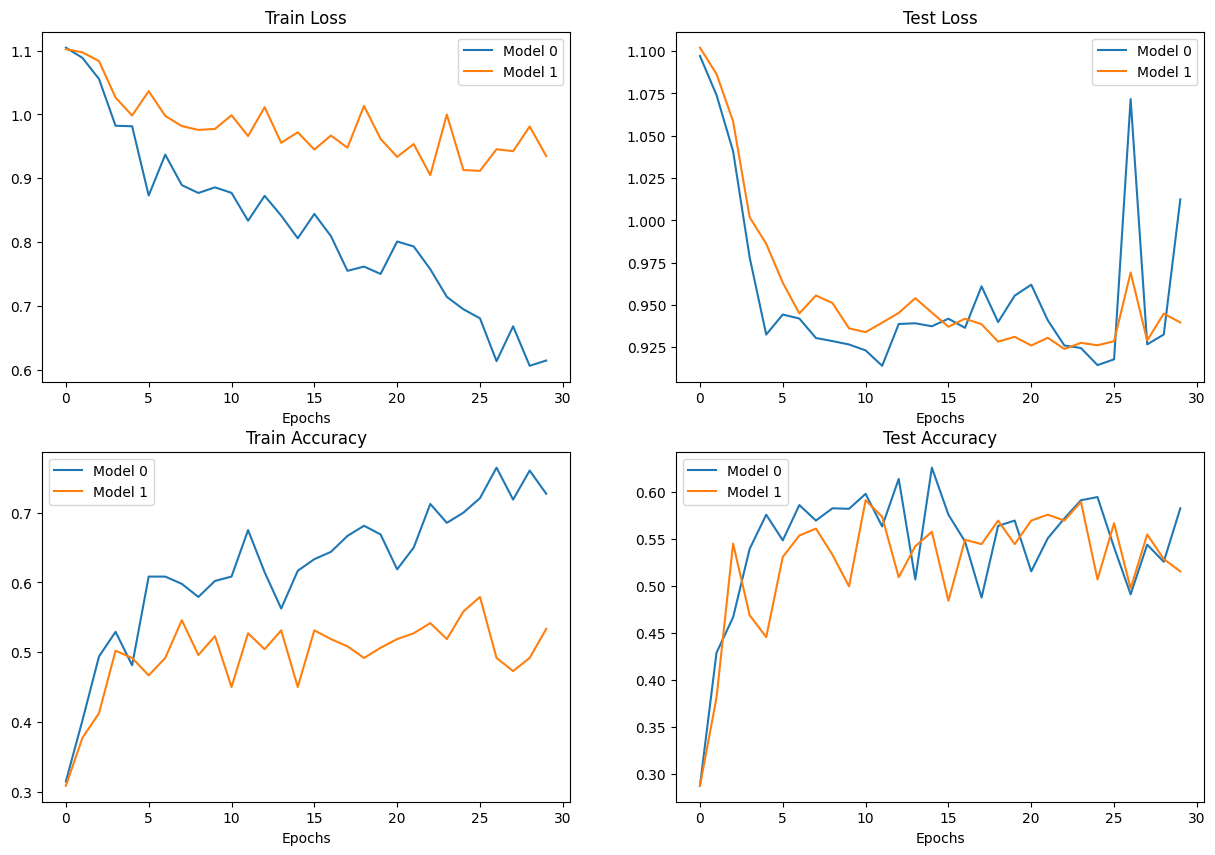

In [71]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df['train_loss'], label='Model 0')
plt.plot(epochs, model_1_df['train_loss'], label='Model 1')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df['test_loss'], label='Model 0')
plt.plot(epochs, model_1_df['test_loss'], label='Model 1')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df['train_acc'], label='Model 0')
plt.plot(epochs, model_1_df['train_acc'], label='Model 1')
plt.title('Train Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df['test_acc'], label='Model 0')
plt.plot(epochs, model_1_df['test_acc'], label='Model 1')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.legend();

## 11. Making a prediction on a custom image

Although we've trained a model on custom data... how do you make a prediction on a sample/image that's not in either training or testing dataset.

In [72]:
# Download custom image
import requests

# Setup custom image path
custom_img_path = data_path / 'test-img-1.jpg'

# Download the image if it doesn't already exist
if not custom_img_path.is_file():
  with open(custom_img_path, 'wb') as f:
    # When downloading from GitHub, need to use the 'raw' file link
    request = requests.get('https://raw.githubusercontent.com/JDChiaki/ICT358_Final_Project/main/test-img-1.jpg')
    print(f'Downloading {custom_img_path}...')
    f.write(request.content)
    print('Success!')
else:
  print(f'{custom_img_path} already exists, skipping download...')

data/test-img-1.jpg already exists, skipping download...


### 11.1 Loading in a custom image with PyTorch

We have to make sure our custom image is in the same format as the data our model with trained on.
* In tensor form with datatype (`torch.float32`)
* Of shape 64x64x3
* On the right device

In [73]:
import torchvision

# Read in custom image
custom_img_unit8 = torchvision.io.read_image(str(custom_img_path))
print(f'Custom image tensor: \n {custom_img_unit8}')
print(f'Custom image shape: {custom_img_unit8.shape}')
print(f'Custom image datatype: {custom_img_unit8.dtype}')

Custom image tensor: 
 tensor([[[  9,  10,   8,  ..., 149, 149, 150],
         [ 10,  10,   8,  ..., 149, 149, 150],
         [ 10,  10,   8,  ..., 150, 149, 149],
         ...,
         [  1,   1,   1,  ...,  68,  54,  63],
         [  1,   1,   1,  ...,  73,  53,  42],
         [  1,   1,   1,  ...,  58,  69,  58]],

        [[  6,   7,   7,  ..., 123, 123, 124],
         [  7,   7,   7,  ..., 123, 123, 124],
         [  7,   7,   7,  ..., 124, 123, 123],
         ...,
         [  1,   1,   1,  ...,  50,  36,  45],
         [  1,   1,   1,  ...,  55,  35,  24],
         [  1,   1,   1,  ...,  40,  51,  40]],

        [[ 35,  36,  38,  ...,  86,  88,  89],
         [ 36,  36,  38,  ...,  86,  88,  89],
         [ 36,  36,  38,  ...,  87,  88,  88],
         ...,
         [  1,   1,   1,  ...,  36,  22,  31],
         [  1,   1,   1,  ...,  41,  21,  10],
         [  1,   1,   1,  ...,  26,  37,  26]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 800, 1200])
Custom image data

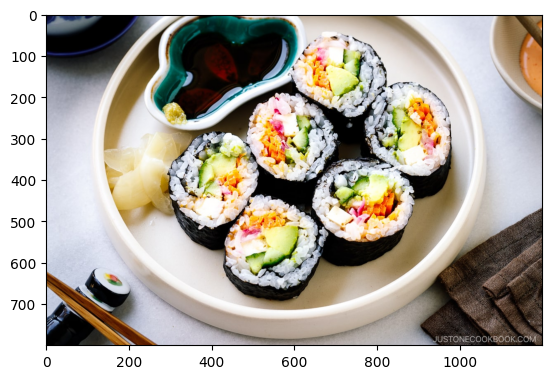

In [74]:
plt.imshow(custom_img_unit8.permute(1, 2, 0));

### 11.2 Making a perdiction on a custom image with a trained PyTorch model

In [75]:
# Load in the custom image and convert to torch.float32
custom_img = torchvision.io.read_image(str(custom_img_path)).type(torch.float32) / 255.
custom_img

tensor([[[0.0353, 0.0392, 0.0314,  ..., 0.5843, 0.5843, 0.5882],
         [0.0392, 0.0392, 0.0314,  ..., 0.5843, 0.5843, 0.5882],
         [0.0392, 0.0392, 0.0314,  ..., 0.5882, 0.5843, 0.5843],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.2667, 0.2118, 0.2471],
         [0.0039, 0.0039, 0.0039,  ..., 0.2863, 0.2078, 0.1647],
         [0.0039, 0.0039, 0.0039,  ..., 0.2275, 0.2706, 0.2275]],

        [[0.0235, 0.0275, 0.0275,  ..., 0.4824, 0.4824, 0.4863],
         [0.0275, 0.0275, 0.0275,  ..., 0.4824, 0.4824, 0.4863],
         [0.0275, 0.0275, 0.0275,  ..., 0.4863, 0.4824, 0.4824],
         ...,
         [0.0039, 0.0039, 0.0039,  ..., 0.1961, 0.1412, 0.1765],
         [0.0039, 0.0039, 0.0039,  ..., 0.2157, 0.1373, 0.0941],
         [0.0039, 0.0039, 0.0039,  ..., 0.1569, 0.2000, 0.1569]],

        [[0.1373, 0.1412, 0.1490,  ..., 0.3373, 0.3451, 0.3490],
         [0.1412, 0.1412, 0.1490,  ..., 0.3373, 0.3451, 0.3490],
         [0.1412, 0.1412, 0.1490,  ..., 0.3412, 0.3451, 0.

In [76]:
# Create transform pipeline to resize image
from torchvision import transforms
custom_img_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

# Transform target image
custom_img_transformed = custom_img_transform(custom_img)

# Print out the shapes
print(f'Original shape: {custom_img.shape}')
print(f'Transformed shape: {custom_img_transformed.shape}')

Original shape: torch.Size([3, 800, 1200])
Transformed shape: torch.Size([3, 64, 64])


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


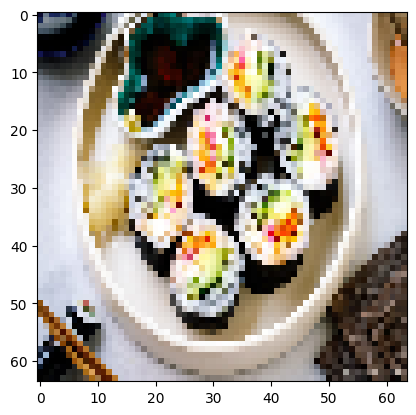

In [77]:
plt.imshow(custom_img_transformed.permute(1, 2, 0));

In [78]:

model_1.eval()
with torch.inference_mode():
  custom_img_pred = model_1(custom_img_transformed.unsqueeze(0).to(device))
custom_img_pred

tensor([[ 0.0112, -1.1408,  0.4438]])

Note, to make a prediction on a custom image we had to:
* Load the image and turn it into a tensor
* Make sure the image was the same datatype as the model (`torch.float32`)
* Make sure the image was the same shape as the data the model was trained on (3, 64, 64) with a batch size... (1, 3, 64, 64)
* Make sure the image was on the same device as our model

In [79]:
# conver logits -> prediction probabilities
custom_img_pred_probs = torch.softmax(custom_img_pred, dim=1)
custom_img_pred_probs

tensor([[0.3500, 0.1106, 0.5394]])

In [80]:
# Convert  prediction probabilities -> prediction labels
custom_img_pred_labels = torch.argmax(custom_img_pred_probs, dim=1)
custom_img_pred_labels

tensor([2])

In [81]:
class_names[custom_img_pred_labels]

'sushi'

### 11.3 Putting custom image prediction together: building a function

Ideal outcome:
A function where we pass an image path to and have our model predict on that image and plot the image + prediction.

In [82]:
def pred_and_plot_img(model: torch.nn.Module,
                      img_path: str,
                      class_names: List[str] = None,
                      transform: transforms.Compose =None,
                      device: str = device):
  '''Makes a prediction on a target image with a trained model and pots the image and prediction.'''
  # Load in the image
  target_img = torchvision.io.read_image(str(img_path)).type(torch.float32)

  # Devide the image pixel values by 255 to get them between [0, 1]
  target_img = target_img / 255.

  # Transform if neccessary
  if transform:
    target_img = transform(target_img)

  # Make sure the model is on the target device
  model.to(device)

  # Turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to the image (this is the batch dimension, e.g. our model will predict on batches of 1x image)
    target_img = target_img.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_img_pred = model(target_img.to(device))  # make sure the target image is on the right device

  # Convert logits -> prediction probabilities
  target_img_pred_probs = torch.softmax(target_img_pred, dim=1)

  # Convert prediction probabilities -> prediction labels
  target_img_pred_label = torch.argmax(target_img_pred_probs, dim=1)

  # Plot the image alongside the prediction and prediction probability
  plt.imshow(target_img.squeeze().permute(1, 2, 0))  # remove batch dimension and rearragne shape to be HWC
  if class_names:
    title = f'Pred: {class_names[target_img_pred_label.cpu()]} | Prob: {target_img_pred_probs.max().cpu():.3f}'
  else:
    title = f'Pred: {target_img_pred_label} | Prob: {target_img_pred_probs.max().cpu():.3f}'
  plt.title(title)
  plt.axis(False)

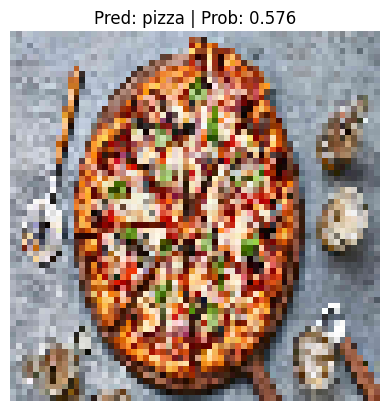

In [93]:
# Pred on our custom image
pred_and_plot_img(model=model_0,
                  img_path=str(data_path / 'test-img-3.jpg'),
                  class_names=class_names,
                  transform=custom_img_transform,
                  device=device)